In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pyuvdata import UVData
from ja import Timer

In [3]:
timer = Timer()

In [4]:
# We need this to just get the part of the file name with the JD in it
def zenstem(filelist):
    stemlist = []
    for f in filelist:
        tmp = (os.path.basename(f)).split('.')
        stemlist.append(tmp[0]+'.'+tmp[1]+'.'+tmp[2])
    stemlist.sort()
    return stemlist

This is basically breaking the `splitDay` function out line-by-line to test it.

In [34]:
JD = '2458098'
radDay = 2*np.pi
interval = 2./(24*60.)*2*np.pi # 2 minutes
path = '/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/'+JD+'/'
imaged_path = '/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/'+JD+'/'

In [7]:
# Import all of Adam's functions
import lst_slicer

In [8]:
sliced, master_dict = lst_slicer.slice_day (path, JD, interval)

In [14]:
keys = master_dict.keys()

In [38]:
lsts = []
jds = []
filenames = []
for key in list(keys):
    jds.append(key[0])
    lsts.append(key[1])
    filenames.append(master_dict[key])
lsts = np.array(lsts)
jds = np.array(jds)
filenames = np.array(filenames)

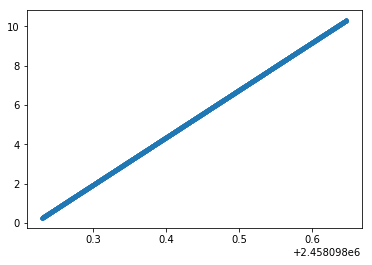

In [31]:
plt.plot(jds,lsts*24/(2.*np.pi),'.')

In [58]:
interval = 2.155/(24*60.)*2*np.pi # 2 minutes
nsamps = []
lst_grid = []
for i in np.arange(0, radDay, interval):
    wh = np.logical_and(lsts >= i, lsts < i+interval)
    nsamp = wh.sum()
    if nsamp > 0:
        necessary_files = np.unique(filenames[wh])
        #print(i*24/(2.*np.pi), nsamp, necessary_files)
        nsamps.append(nsamp)
        lst_grid.append(i)
        #uvd = UVData()
        #uvd.read(necessary_files).select(times=jds[wh]).write_uvh5(fileout)
nsamps = np.array(nsamps)

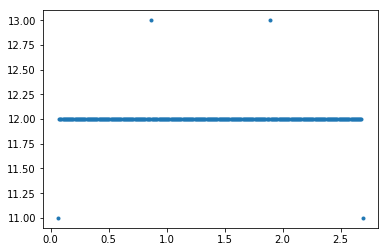

In [59]:
plt.plot(lst_grid,nsamps,'.')

In [59]:
imagefiles = lst_slicer.imaged_files(imaged_path)
# Strip off path and suffix so we're just comparing the JD of the file ...
imagefiles = zenstem(imagefiles)

In [61]:
len(imagefiles)

56

In [62]:
dict_list = list(master_dict)

In [63]:
radDay = 2*np.pi

In [70]:
for i in np.arange(0, radDay, interval):
    files = list(lst_slicer.find_files(JD, i, i+interval, master_dict))
    fi_li = zenstem(files)
    
    #check if files have imaged files
    check = lst_slicer.checkImageFiles(fi_li, imagefiles)
        
    if len(fi_li) == 0 or (not check):
        continue
    else:
        
        print(i*24./(2.*np.pi), fi_li) 
         
        timer.start()    
        uvd = UVData()
        uvd.read(files,read_data=True, read_metadata=True)
        timer.stop('Reading data')
        
        LST = np.unique(uvd.lst_array)
        times = np.unique(uvd.time_array)

        indexs = np.logical_and(LST >= i, LST <=i+interval)

        oneNfiftyScs = (110./60.)/(24*60.)*2*np.pi

        if (LST[indexs].max() - LST[indexs].min() >= oneNfiftyScs):
            print('GOOD', LST[indexs].min()*24./(2.*np.pi), LST[indexs].max()*24./(2.*np.pi), times[indexs][0])


0.23333333333333334 ['zen.2458098.22991']
Reading data 17.0986590385437 sec
0.26666666666666666 ['zen.2458098.22991']
Reading data 15.054505825042725 sec
0.3 ['zen.2458098.22991']
Reading data 17.46056866645813 sec
0.3333333333333333 ['zen.2458098.22991']
Reading data 16.686492443084717 sec
0.36666666666666664 ['zen.2458098.22991']
Reading data 15.254286289215088 sec
0.4 ['zen.2458098.22991']
Reading data 17.879183292388916 sec
0.4 ['zen.2458098.22991'] 0.10479622025848749 0.11340905232346647 2458098.235938383
0.4333333333333334 ['zen.2458098.23737']
Reading data 14.847736597061157 sec
0.4666666666666667 ['zen.2458098.23737']
Reading data 16.742488145828247 sec
0.5 ['zen.2458098.23737']
Reading data 17.001638650894165 sec
0.5333333333333333 ['zen.2458098.23737']
Reading data 16.164175748825073 sec
0.5666666666666668 ['zen.2458098.23737']
Reading data 16.286028623580933 sec
0.6 ['zen.2458098.23737', 'zen.2458098.24482']
Reading data 80.79785370826721 sec
0.6333333333333334 ['zen.2458098

KeyboardInterrupt: 

In [68]:
files

['/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/Test/zen.2458098.23737.HH.calibrated.uvh5',
 '/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/Test/zen.2458098.24482.HH.calibrated.uvh5']

 0.21958017349243164 sec


In [53]:
uvd.lst_array

array([0.06721294, 0.06721294, 0.06721294, ..., 0.11340905, 0.11340905,
       0.11340905])